In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install partition-networkx

In [3]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from starter import *
import random


C:\Users\jaiwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#SOLVE WITH COMMUNITY LOUVAIN, NERGE 2 SMALLEST TOGETHER UNTIL ONLY 10 GROUPS
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']

    # compute the best partition
    partition = community_louvain.best_partition(G, resolution=0.8)

    #divide into groups
    res = {}
    for i, v in partition.items():
        res[v] = [i] if v not in res.keys() else res[v] + [i]

    #find two smallest groups by len and merge them until only 10 groups
    while len(res.keys()) > 7:
        smallest_group = min(res.keys(), key=lambda x: len(res[x]))
        res_copy = res.copy()
        res_copy.pop(smallest_group)
        second_smallest_group = min(res_copy.keys(), key=lambda x: len(res_copy[x]))
        res[smallest_group] = res[smallest_group] + res[second_smallest_group]
        res.pop(second_smallest_group)

    #creating the output file
    num_nodes = len(G.nodes)
    output_arr = [0] * num_nodes
    for key in res.keys():
        for j in res[key]:
            output_arr[j] = key

    for v in range(len(output_arr)):
        if output_arr[v] < 0:
            print(output_arr[v])
        G.nodes[v]['team'] = output_arr[v] + 1
        


In [ ]:
#SOLVE WITH COMMUNITY LOUVAIN
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']

        # compute the best partition
    partition = community_louvain.best_partition(G)

    #divide into groups
    res = {}
    for i, v in partition.items():
        res[v] = [i] if v not in res.keys() else res[v] + [i]

    #creating the output file
    num_nodes = len(G.nodes)
    output_arr = [0] * num_nodes
    for i in range(max(res.keys()) + 1):
        for j in res[i]:
            output_arr[j] = i

    for v in range(len(output_arr)):
        if output_arr[v] < 0:
            print(output_arr[v])
        G.nodes[v]['team'] = output_arr[v] + 1
        


In [ ]:
#Genetic Algorithm Solution 
def solve(G: nx.Graph):
    #Set number of starter solutions
    n = 700
    #Generate n random nx.Graph solutions with teams set
    solutions = [random_solution(G) for i in range(n)]
    #Set number of generations
    generations = 20
    #Set number of solutions to keep
    keep = 50
    #Set number of solutions to mutate
    mutate = 20
    #Set number of solutions to crossover
    crossover = 5
    #Set number of solutions to generate
    generate = 100
    while generations > 0:
        #print(generations)
        #Evaluate fitness of solutions
        fitness = [fitness_function(solution) for solution in solutions]
        #Sort solutions by fitness
        solutions = [x for _,x in sorted(zip(fitness, solutions), key = lambda x: x[0])]
        #Keep best solutions
        solutions = solutions[:keep]
        #Mutate random solutions
        to_mutate = random.sample(range(keep), mutate)
        for i in to_mutate: #TODO: Change to random i selection
            solutions.append(mutate_solution(solutions[i]))
        #Crossover solutions
        #for i in range(crossover): #TODO: Change to random i selection
        #    solutions.append(crossover_solution(solutions[i], solutions[i+1]))
        #Generate new solutions
        for i in range(generate):
            solutions.append(random_solution(G))
        #Decrement generations
        generations -= 1
    solutions.sort(key=fitness_function)
    print(score(solutions[0]))
    best = solutions[0]
    for v in range(len(G.nodes)):
        G.nodes[v]['team'] = int(best.nodes[v]['team']) + 1
    return G
    
def fitness_function(G):
    return score(G)

def mutate_solution(G):
    G_copy = G.copy()
    #Set number of nodes to mutate
    n = len(G_copy.nodes) // 2
    #Get list of nodes
    nodes = list(G_copy.nodes)
    #Randomly select n nodes
    nodes = random.sample(nodes, n)
    #Get list of teams
    teams = list(set([G_copy.nodes[node]['team'] for node in nodes]))
    #Change team of n random nodes in G_copy to a random team
    sampled = random.sample(range(len(G_copy.nodes)), n)
    for node in sampled:
        G_copy.nodes[node]['team'] = random.choice(teams)
    return G_copy

def random_solution(G):
    #Create a copy of the graph
    G_copy = G.copy()
    #Get the number of nodes in the graph
    num_nodes = len(G.nodes)
    #num teams
    num_teams = np.random.randint(1, 20)
    #Create an array of size num_nodes and fill it with random numbers from 0 to 9
    output_arr = np.random.randint(0, num_teams, num_nodes)
    #Assign each node in the graph a team from the array
    for v in range(len(output_arr)):
        G_copy.nodes[v]['team'] = output_arr[v]
    # print("rand")
    return G_copy

In [ ]:
#Check if all nodes have same amount of edges or mostly the same
def same_degree(G):
    degrees = [G.degree(node) for node in G.nodes]
    return len(set(degrees)) == 1

#Check if all nodes are connected to the next n neighbords or mostly the same
def neighbor_connected(G, n):
    for node in G.nodes:
        #check if it has edge to next node
        for i in range(n):
            if not G.has_edge(node, (node + i) % len(G.nodes)):
                return False
    return True

#If neighbor connected then create teams where they are not connected to anyone in their team
def solve(G):
    print("Same degree? " + str(same_degree(G)))
    for i in range(1,10):
        if neighbor_connected(G, i):
            print("neighbor connected", i)
    for node in G.nodes:
        G.nodes[node]['team'] = 1
    


In [96]:
#brute force solution
def solve(G):
    n = 10000
    solutions = []
    for i in range(n):
        if i % 1000 == 0:
            print(i)
        solutions.append(random_solution(G))

    solutions.sort(key=fitness_function)
    print(score(solutions[0]))
    best = solutions[0]
    for v in range(len(G.nodes)):
        G.nodes[v]['team'] = int(best.nodes[v]['team']) + 1
    return G

def fitness_function(G):
    return score(G)

def random_solution(G):
    num_teams = np.random.randint(2, 50)
    #Create a copy of the graph
    G_copy = G.copy()
    #Get the number of nodes in the graph
    num_nodes = len(G.nodes)
    #Create an array of size num_nodes and fill it with random numbers from 0 to 9
    output_arr = np.random.randint(1, num_teams, num_nodes)
    #Assign each node in the graph a team from the array
    for v in range(len(output_arr)):
        G_copy.nodes[v]['team'] = output_arr[v]
    # print("rand")
    return G_copy

In [88]:
def solve(G):
    solve_size_n(G, 5)
    

#Grouping the nodes into teams of x size, first starting by grouping them into groups with 0 conflict between them, then trying to make them similar sizes
def solve_size_n(G, num_teams):
    groups = find_groups(G)
    num_nodes = len(G.nodes)
    upper_bound_size = 24
    lower_bound_size = 16
    rough_size = range(lower_bound_size, upper_bound_size)
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    largest_group = max(groups, key=len)
    smallest_group = min(groups, key=len)
    count = 0
    while (len(largest_group) not in rough_size) and (len(smallest_group) not in rough_size):
        count += 1
        largest_group = max(groups, key=len)
        smallest_group = min(groups, key=len)
        if count % 100 == 0:
            print("Count: ", count, "Num Edges: " , len(edges))
            print("Largest size: ", len(largest_group), "/ Largest group: ", largest_group)
            print("Smallest size: ", len(smallest_group), "/ Smallest group: ", smallest_group)
            print("Groups: ", groups)
        if len(largest_group) > upper_bound_size:
            #find the edge with the smallest weight that is in the largest group
            for edge in edges:
                if edge[0] in largest_group or edge[1] in largest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    break
            #move the smallest_edge from largest_group to the group that it connects to
            if smallest_edge[0] in largest_group:
                for group in groups:
                    if smallest_edge[1] in group:
                        group.add(smallest_edge[0])
                        largest_group.remove(smallest_edge[0])
                        break
            if smallest_edge[1] in largest_group:
                for group in groups:
                    if smallest_edge[0] in group:
                        group.add(smallest_edge[1])
                        largest_group.remove(smallest_edge[1])
                        break
        else:
            #find the edge with the smallest weight that is in the smallest group
            for edge in edges:
                if edge[0] in smallest_group or edge[1] in smallest_group:
                    smallest_edge = edge
                    edges.remove(edge)
                    if count % 500 == 0:
                        print("Smallest edge: ", smallest_edge)
                        print("LEN EDGES: ", len(edges))
                    break
            #move the smallest_edge from smallest_group to the group that it connects to
            if smallest_edge[0] in smallest_group:
                for group in groups:
                    if smallest_edge[1] in group:
                        group.add(smallest_edge[0])
                        if len(smallest_group) == 1:
                            #delete smallest group from groups and select new smallest group
                            groups.remove(smallest_group)
                            smallest_group = min(groups, key=len)
                        break
            if smallest_edge[1] in smallest_group:
                for group in groups:
                    if smallest_edge[0] in group:
                        group.add(smallest_edge[1])
                        if len(smallest_group) == 1:
                            #delete smallest group from groups and select new smallest group
                            groups.remove(smallest_group)
                            smallest_group = min(groups, key=len)                        
                        break
    #assign the nodes to be in the same team as the group they are in
    for node in G.nodes:
        for group in groups:
            if node in group:
                G.nodes[node]['team'] = groups.index(group)
                break

#find the groups, then combinne the smallest 2 groups repeatedly until there are only num_teams groups    
def solve_group_smallest_groups(G, num_teams):
    groups = find_groups(G)
    while len(groups) > num_teams:
        smallest_group = min(groups, key=len)
        second_smallest_group = min(groups, key=lambda x: len(x) if x != smallest_group else float('inf'))
        smallest_group.update(second_smallest_group)
        groups.remove(second_smallest_group)
    for node in G.nodes:
        for group in groups:
            if node in group:
                G.nodes[node]['team'] = groups.index(group) + 1
                break

#find the groups of nodes which would have 0 conflict between them, aka no edges between them
def find_groups(G):
    groups = []
    visited = set()
    for node in G.nodes:
        if node not in visited:
            group = set()
            group.add(node)
            visited.add(node)
            for node2 in G.nodes:
                if node2 not in visited and not G.has_edge(node, node2):
                    group.add(node2)
                    visited.add(node2)
            groups.append(group)
    return groups

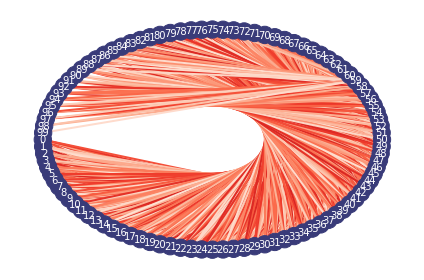

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
55210.01170416551


64883.61596383458

In [97]:
G = read_input(r'inputs/small103.in')
visualize(G)

solve(G)
validate_output(G)
score(G)


In [ ]:
run_all(solve, 'samedegreeinput', 'samedegreeoutput', overwrite=True)


In [ ]:
run_all(solve, 'inputs', 'outputs', overwrite=True)
tar('outputs', overwrite=True)